In [1]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0
x

array([[0., 1.],
       [1., 1.]])

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2,2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [4]:
x[0,0]=0
# to validate that tensorflow tensors are not be assignable

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5744055 ],
       [-0.75987834],
       [ 1.6092137 ]], dtype=float32)>


In [6]:
#a state of a tensorflow tensor can be assigned via its "assign" method

v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
v[0, 0].assign(3)
#assigning a value to be a subset of a TensorFlow variable

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v.assign_add(tf.ones((3,1)))

#basically add ones as per tf.ones to all rows - 3 and all the cureent col- which is 1

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [9]:
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Mathematical Operations

In [10]:
a = tf.ones((4,1))
a

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
b = tf.square(a)
b

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
c = tf.sqrt(b)
c

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [13]:
d = b+c
d

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[2.],
       [2.],
       [2.],
       [2.]], dtype=float32)>

In [14]:
e = tf.matmul(a, tf.transpose(b))
e

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [15]:
e *=d

To Understand Better

In [16]:
input_var = tf.Variable(initial_value=3)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [17]:
input_const = tf.constant(3)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [18]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [19]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)


#np.random.multivaraiet_normal?


In [20]:
negative_samples

array([[-0.43920067,  2.90597724],
       [-0.3210172 ,  1.96852285],
       [-0.0844122 ,  2.63527229],
       ...,
       [-0.45907312,  2.22905251],
       [ 0.72495093,  3.15449137],
       [ 0.13773404,  2.40509394]])

In [21]:
positive_samples

array([[ 4.47639464,  1.44329763],
       [ 2.77997356, -0.12085984],
       [ 2.25556144, -0.17775528],
       ...,
       [ 3.55796663,  1.56066655],
       [ 2.90613168,  0.51228442],
       [ 2.22563784,  0.06332931]])

In [22]:
negative_samples.shape

(1000, 2)

In [23]:
positive_samples.shape

(1000, 2)

In [24]:
positive_samples.dtype

dtype('float64')

In [25]:
#to stack both smaples on each o
input = np.vstack((negative_samples, positive_samples)).astype(np.float32)

input

array([[-0.43920067,  2.9059772 ],
       [-0.3210172 ,  1.9685229 ],
       [-0.08441219,  2.6352723 ],
       ...,
       [ 3.5579667 ,  1.5606666 ],
       [ 2.9061317 ,  0.5122844 ],
       [ 2.225638  ,  0.06332931]], dtype=float32)

In [26]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

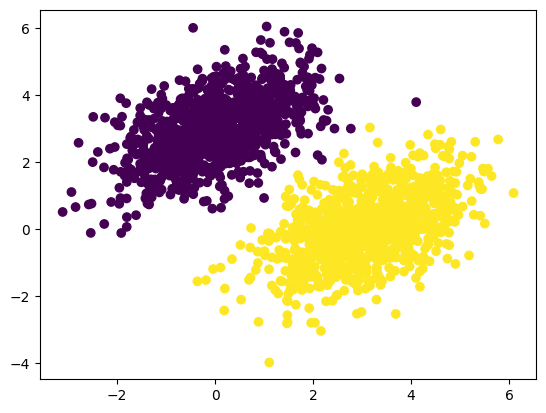

In [27]:
import matplotlib.pyplot as plt
plt.scatter(input[:,0], input[:, 1], c=targets[:,0])

plt.show()

A linear classifier is an affine transformation (prediction = W • input + b)

In [28]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Forward Pass Function

In [29]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [30]:
def square_loss(targest, predictions):
  per_sample_losses = tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_losses)

  #tf.reduce_mean?

Th Training Step Function

In [31]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

or simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training step (gradient computation and weight update) for all the data, rather than iterate over the data in small batches. On one hand, this means that each training step will take much longer to run, since we’ll compute the forward pass and the gradients for 2,000 samples at once. On the other hand, each gradient update will be much more effective at reducing the loss on the training data, since it will encompass information from all training samples instead of, say, only 128 random samples. As a result, we will need many fewer steps of training, and we should use a larger learning rate than we would typically use for mini-batch training (we’ll use learning_rate = 0.1, defined in listing 3.20).

---
The Batch Training Loop

In [32]:
for step in range(40):
  loss = training_step(input, targets)
  print(f"loss at step {step}: {loss:.4f}")


loss at step 0: 5.8804
loss at step 1: 1.0139
loss at step 2: 0.2822
loss at step 3: 0.1640
loss at step 4: 0.1379
loss at step 5: 0.1261
loss at step 6: 0.1171
loss at step 7: 0.1092
loss at step 8: 0.1020
loss at step 9: 0.0954
loss at step 10: 0.0893
loss at step 11: 0.0838
loss at step 12: 0.0787
loss at step 13: 0.0741
loss at step 14: 0.0699
loss at step 15: 0.0660
loss at step 16: 0.0624
loss at step 17: 0.0592
loss at step 18: 0.0562
loss at step 19: 0.0535
loss at step 20: 0.0510
loss at step 21: 0.0487
loss at step 22: 0.0466
loss at step 23: 0.0447
loss at step 24: 0.0430
loss at step 25: 0.0414
loss at step 26: 0.0399
loss at step 27: 0.0385
loss at step 28: 0.0373
loss at step 29: 0.0362
loss at step 30: 0.0352
loss at step 31: 0.0342
loss at step 32: 0.0334
loss at step 33: 0.0326
loss at step 34: 0.0319
loss at step 35: 0.0312
loss at step 36: 0.0306
loss at step 37: 0.0300
loss at step 38: 0.0295
loss at step 39: 0.0291


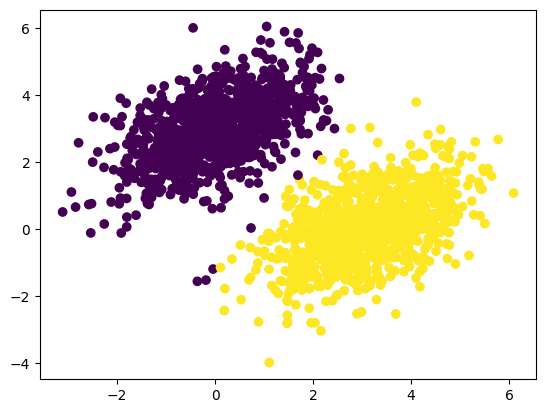

In [33]:
predictions = model(input)

plt.scatter(input[:, 0], input[:,1], c=predictions[:,0]>0.5)

plt.show()

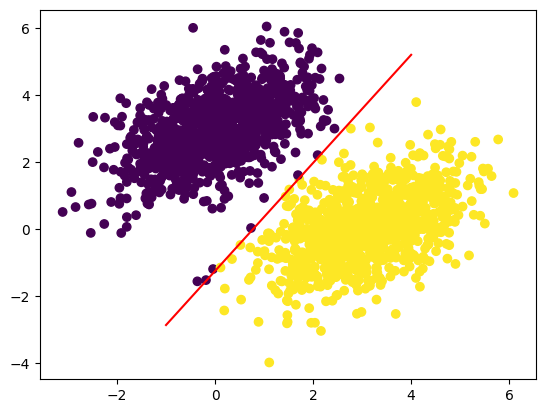

In [34]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(input[:, 0], input[:, 1], c=predictions[:, 0] > 0.5)

## <span style= "color: #82C8E5;"> IMDB Binary Classification w Neural Networks </span>

In [35]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [38]:
train_labels[0]

np.int64(1)

In [45]:
for sequence in train_data:
  print(max(sequence))

Streaming output truncated to the last 5000 lines.
9781
7671
8276
9669
6008
9227
9334
7534
9646
7108
9643
8191
9454
5354
9058
9702
6414
9790
9337
9871
3379
9849
9472
6253
9942
9595
7142
8278
9969
8825
9729
5787
9789
9195
7070
9321
9923
9929
7530
9984
6917
8788
8769
9832
9928
9429
9704
7298
9742
9986
3537
9379
9760
9805
8142
9990
8367
5492
9705
7000
8461
9253
9206
9733
8622
9821
9135
9641
9966
8068
9999
9858
6376
8801
8920
9083
7276
9576
3029
9712
9998
9707
8916
9901
8254
9641
8163
8754
9587
8257
6220
6340
7995
9914
8916
9235
9934
9531
6893
9486
9133
9056
9593
6772
8980
9961
7493
8610
9224
9940
9227
8119
8954
9776
7400
9785
7774
9073
9179
9984
8592
9204
8218
9665
9820
9720
9996
9807
9150
9994
9229
9201
8677
7613
5366
6505
7883
8903
9578
9666
9755
7240
8718
9118
9743
5494
9194
9763
4347
6738
9217
9221
9834
8819
9694
8098
9357
9686
8697
9270
9736
9880
9601
9545
9920
6604
8824
9612
8893
8448
9194
9725
9550
3626
9224
9162
6344
9874
9121
9658
8256
9095
9573
9625
9979
9173
9929
9540
7380
3773

In [42]:
max([max(sequence) for sequence in train_data])


9999

In [49]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [48]:
reverse_word_index = [(value, key) for (key, value) in word_index.items()]
reverse_word_index

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's"),
 (25242, 'rickman'),
 (6746, 'arranged'),
 (52014, 'rumbustious'),
 (52015, 'familiarness'),
 (52016, "spider'"),
 (68804, 'hahahah'),
 (52017, "wood'"),
 (40833, 'transvestism'),
 (34702, "hangin'"),
 (2338, 'bringing'),
 (40834, 'seamier'),
 (34703, 'wooded'),
 (52018, 'bravora'),
 (16817, 'grueling'),
 (1636, 'wooden'),
 (16818, 'wednesday'),
 (52019, "'prix"),
 (34704, 'altagracia'),
 (52020, 'circuitry'),
 (11585, 'crotch'),
 (57766, 'busybody'),
 (52021, "tart'n'tangy"),
 (14129, 'burgade'),
 (52023, 'thrace'),
 (11038, "tom's"),
 (52025, 'snuggles'),
 (29114, 'francesco'),

In [52]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
    )


In [53]:
#word_index = imdb.get_word_index()                                ❶
#reverse_word_index = dict(
 #   [(value, key) for (key, value) in word_index.items()])        ❷
#decoded_review = " ".join(
 #   [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [56]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [57]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [58]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [60]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
                          ])

In [63]:
model.compile(
    optimizer="rmsprop",
    loss ="binary_crossentropy",
    metrics = ["accuracy"]
)